In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

In [28]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Titanic Project

### What does the data look like?

In [29]:
#Read original data set
original_df = pd.read_csv('Data/Titanic_Data.csv')
print(original_df.shape)
print(original_df.count())

(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [30]:
#Drop the Cabin column because too many missing values
original_df = original_df.drop(labels=None, axis=0,
index=None, columns='Cabin', level=None, inplace=False, errors='raise')

In [31]:
original_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,C
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,S
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,S


<AxesSubplot:ylabel='Sex'>

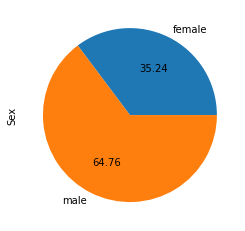

In [32]:
#Pie chart for male and female %
original_df.groupby('Sex').size().plot(kind='pie', autopct='%.2f', y="Male vs Female %", ylabel = 'Sex')

<AxesSubplot:ylabel='Pclass'>

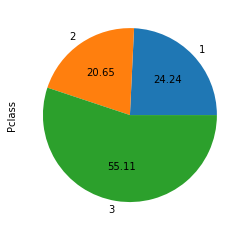

In [33]:
original_df.groupby('Pclass').size().plot(kind='pie', autopct='%.2f', ylabel = 'Pclass')

### What is the age average?

In [34]:
#Count number of nans
original_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [35]:
#Ages without nans
df_Ages = original_df["Age"]
df_Ages.dropna(inplace = True) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [36]:
#Verify Nans were dropped
print("Number of ages in original data (including Nans):", original_df["Age"].count() + original_df["Age"].isna().sum())
print("Number of ages in original data (excluding Nans):", original_df["Age"].count())
print("Number of ages in df_Ages:", df_Ages.count())
print("Number of nans in df_Ages:", df_Ages.isna().sum())

Number of ages in original data (including Nans): 891
Number of ages in original data (excluding Nans): 714
Number of ages in df_Ages: 714
Number of nans in df_Ages: 0


In [37]:
#Calculate mean age of adults (18+)
mean_adult_age = df_Ages[df_Ages >= 18].mean() #https://stackoverflow.com/questions/44270272/getting-average-of-rows-in-dataframe-greater-than-or-equal-to-zero
print("Calculated mean adult age:",mean_adult_age)
print("Rounded mean adult age:", round(mean_adult_age))

#Calculate mean age of kids (< 18)
mean_kid_age = df_Ages[df_Ages < 18].mean()
print("Calculated mean kid age:", mean_kid_age)
print("Rounded mean kid age:", round(mean_kid_age))

Calculated mean adult age: 33.58319467554077
Rounded mean adult age: 34
Calculated mean kid age: 9.041327433628318
Rounded mean kid age: 9


In [38]:
#New Data Frame consisting of Ages & Genders
df_Sex_Age = pd.concat([original_df["Sex"],original_df["Age"]],axis=1) #https://www.kite.com/python/answers/how-to-create-a-pandas-dataframe-from-columns-in-other-dataframes-in-python
df_Sex_Age.head()

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [39]:
#Calculate average ages of each sex (adult and child)
print("Average of each sex: ")
print()

average_ages_by_sex = df_Sex_Age.groupby("Sex",as_index=False).Age.mean() #https://stackoverflow.com/questions/41504553/pandas-dataframe-how-to-get-average-of-a-value-over-a-certain-index
print(average_ages_by_sex)
print()

#Round the calculated averages
print(round(average_ages_by_sex))

Average of each sex: 

      Sex        Age
0  female  27.915709
1    male  30.726645

      Sex   Age
0  female  28.0
1    male  31.0


In [40]:
#Dataframe of males (and their ages) only
male_ages_df = df_Sex_Age[df_Sex_Age["Sex"]=="male"]
print(male_ages_df)

#Dataframe of females (and their ages) only
female_ages_df = df_Sex_Age[df_Sex_Age["Sex"]=="female"]
print(female_ages_df)

#Calculate adult male average age (18+)
male_ages = male_ages_df["Age"]
adult_male_ages_mean = male_ages[male_ages >= 18].mean()
print()
print("Average adult male age:", adult_male_ages_mean)
print("Average adult male age rounded:", round(adult_male_ages_mean))
print()

#Calculate kid male average age (< 18)
kid_male_ages_mean = male_ages[male_ages < 18].mean()
print("Average kid male age:", kid_male_ages_mean)
print("Average kid male age rounded:", round(kid_male_ages_mean))
print()

#Calculate adult female age (18+)
female_ages = female_ages_df["Age"]
adult_female_ages_mean = female_ages[female_ages >= 18].mean()
print("Average adult female age:", adult_female_ages_mean)
print("Average adult female age rounded:", round(adult_female_ages_mean))
print()

#Calculate kid female age (< 18)
kid_female_ages_mean = female_ages[female_ages < 18].mean()
print("Average kid female age:", kid_female_ages_mean)
print("Average kid female age rounded:", round(kid_female_ages_mean))

      Sex   Age
0    male  22.0
4    male  35.0
5    male   NaN
6    male  54.0
7    male   2.0
..    ...   ...
883  male  28.0
884  male  25.0
886  male  27.0
889  male  26.0
890  male  32.0

[577 rows x 2 columns]
        Sex   Age
1    female  38.0
2    female  26.0
3    female  35.0
8    female  27.0
9    female  14.0
..      ...   ...
880  female  25.0
882  female  22.0
885  female  39.0
887  female  19.0
888  female   NaN

[314 rows x 2 columns]

Average adult male age: 33.937974683544304
Average adult male age rounded: 34

Average kid male age: 8.85637931034483
Average kid male age rounded: 9

Average adult female age: 32.90291262135922
Average adult female age rounded: 33

Average kid female age: 9.236363636363636
Average kid female age rounded: 9


In [41]:
#Calculate average passenger age
avg_age = original_df["Age"].mean()
print("Average passenger age:", avg_age)
print("Average passenger age rounded:", round(avg_age))

Average passenger age: 29.69911764705882
Average passenger age rounded: 30


In [42]:
#Standard Deviation for age
std_age = original_df["Age"].std()
print("Standard deviation for age:", std_age)
print("Standard deviation for age rounded to 3 decimal places:", round(std_age,3))

Standard deviation for age: 14.526497332334044
Standard deviation for age rounded to 3 decimal places: 14.526


In [43]:
#Average age - Standard Deviation for age
print("avg_age - std_age = ", round((avg_age - std_age),3))

avg_age - std_age =  15.173


### What to do with missing Ages?

In [44]:
#Checks if there are any missing values in Ages
print("Is there any missing values in Ages?")
print(original_df['Age'].isnull().values.any())
print()

print("How many missing values?")
print(original_df['Age'].isnull().sum())
print()

print(original_df['Age'].isnull())

Is there any missing values in Ages?
True

How many missing values?
177

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool


In [45]:
#fills in missing ages based on these 6 conditions 
#https://stackoverflow.com/questions/52271267/python-groupby-with-two-conditions-and-calculate-the-mean
characteristics_columns = ['Survived','Pclass','Sex','Embarked','SibSp','Parch']
original_df['Age'] = original_df['Age'].fillna(original_df.groupby(characteristics_columns)['Age'].transform('mean'))

#fills in any remaining missing ages with the average age previously found
original_df['Age'] = original_df['Age'].fillna(avg_age)

#Turns Age into an integer
original_df['Age'] = original_df['Age'].astype(int)



original_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
837,838,0,3,"Sirota, Mr. Maurice",male,28,0,0,392092,8.0500,S
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30,1,1,345773,24.1500,S
434,435,0,1,"Silvey, Mr. William Baird",male,50,1,0,13507,55.9000,S
859,860,0,3,"Razi, Mr. Raihed",male,29,0,0,2629,7.2292,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.8667,S


In [46]:
#Re-checks if there are still any missing values in Ages
print("Is there any missing values in Ages?")
print(original_df['Age'].isnull().values.any())
print()

print("How many missing values?")
print(original_df['Age'].isnull().sum())
print()

print(original_df['Age'].isnull())

Is there any missing values in Ages?
False

How many missing values?
0

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool


In [47]:
#Review means after Age insertions
df_Ages = original_df["Age"]

#Calculate mean age of adults (18+)
mean_adult_age = df_Ages[df_Ages >= 18].mean() #https://stackoverflow.com/questions/44270272/getting-average-of-rows-in-dataframe-greater-than-or-equal-to-zero
print("Calculated mean adult age:",mean_adult_age)
print("Rounded mean adult age:", round(mean_adult_age))

#Calculate mean age of kids (< 18)
mean_kid_age = df_Ages[df_Ages < 18].mean()
print("Calculated mean kid age:", mean_kid_age)
print("Rounded mean kid age:", round(mean_kid_age))

Calculated mean adult age: 33.29933774834437
Rounded mean adult age: 33
Calculated mean kid age: 9.867647058823529
Rounded mean kid age: 10


In [48]:
#Updates dataframe with new values after missing values filled
df_Sex_Age = pd.concat([original_df["Sex"],original_df["Age"]],axis=1)

#Average ages by sex after filling in missing values in Ages
average_ages_by_sex = df_Sex_Age.groupby("Sex",as_index=False).Age.mean() #https://stackoverflow.com/questions/41504553/pandas-dataframe-how-to-get-average-of-a-value-over-a-certain-index
print(average_ages_by_sex)
print()

#Round the calculated averages
print(round(average_ages_by_sex))

      Sex        Age
0  female  27.187898
1    male  31.102253

      Sex   Age
0  female  27.0
1    male  31.0


In [49]:
#Dataframe of males (and their ages) only
male_ages_df = df_Sex_Age[df_Sex_Age["Sex"]=="male"]
print(male_ages_df)

#Dataframe of females (and their ages) only
female_ages_df = df_Sex_Age[df_Sex_Age["Sex"]=="female"]
print(female_ages_df)

#Calculate adult male average age (18+)
male_ages = male_ages_df["Age"]
adult_male_ages_mean = male_ages[male_ages >= 18].mean()
print()
print("Average adult male age:", adult_male_ages_mean)
print("Average adult male age rounded:", round(adult_male_ages_mean))
print()

#Calculate kid male average age (< 18)
kid_male_ages_mean = male_ages[male_ages < 18].mean()
print("Average kid male age:", kid_male_ages_mean)
print("Average kid male age rounded:", round(kid_male_ages_mean))
print()

#Calculate adult female age (18+)
female_ages = female_ages_df["Age"]
adult_female_ages_mean = female_ages[female_ages >= 18].mean()
print("Average adult female age:", adult_female_ages_mean)
print("Average adult female age rounded:", round(adult_female_ages_mean))
print()

#Calculate kid female age (< 18)
kid_female_ages_mean = female_ages[female_ages < 18].mean()
print("Average kid female age:", kid_female_ages_mean)
print("Average kid female age rounded:", round(kid_female_ages_mean))

      Sex  Age
0    male   22
4    male   35
5    male   38
6    male   54
7    male    2
..    ...  ...
883  male   28
884  male   25
886  male   27
889  male   26
890  male   32

[577 rows x 2 columns]
        Sex  Age
1    female   38
2    female   26
3    female   35
8    female   27
9    female   14
..      ...  ...
880  female   25
882  female   22
885  female   39
887  female   19
888  female   29

[314 rows x 2 columns]

Average adult male age: 33.656370656370655
Average adult male age rounded: 34

Average kid male age: 8.677966101694915
Average kid male age rounded: 9

Average adult female age: 32.51898734177215
Average adult female age rounded: 33

Average kid female age: 10.779220779220779
Average kid female age rounded: 11


In [50]:
original_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.722783,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.596700,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survival Rates

In [51]:
#Percentage of those who survived by passenger class
original_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

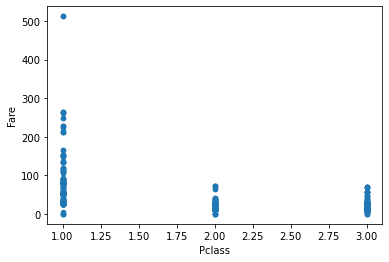

In [52]:
#Price Difference between classes
original_df.plot.scatter(x = 'Pclass', y = 'Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

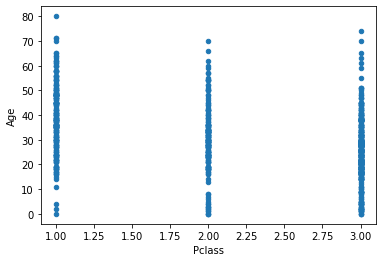

In [53]:
#Age differences between classes
original_df.plot.scatter(x = 'Pclass', y = 'Age')

In [54]:
#percentage of those who survived based on sex
original_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [55]:
#percentage of those who survived based on family relations
original_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


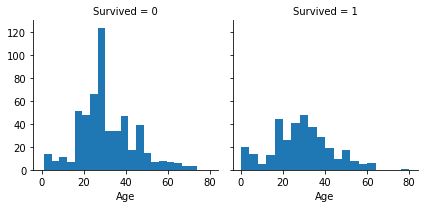

In [56]:
#create histogram based on survived or not
hist = sns.FacetGrid(original_df, col = 'Survived')
hist.map(plt.hist, 'Age', bins = 20)

### Heatmap

In [57]:
#create variable for numeric features
corr = original_df
numeric_features = corr.select_dtypes(include=[np.number])
numeric_features.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

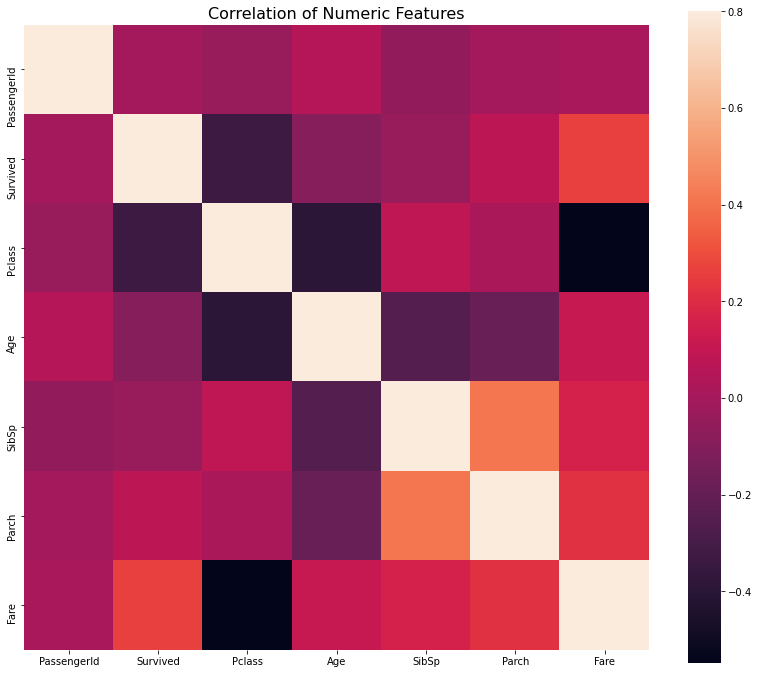

In [58]:
#create heatmap for numeric features
correlation = numeric_features.corr()
f, ax = plt.subplots(figsize = (14, 12))
plt.title('Correlation of Numeric Features', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)

### Histograms

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


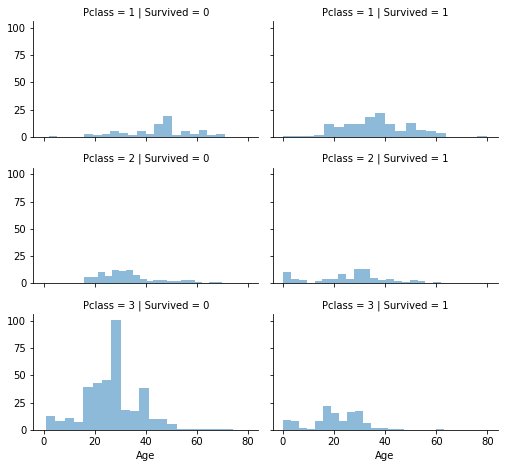

In [59]:
#Pclass 3 had the most passengers and the highest mortality rate. 
# most passengers in pclass 1 survived

grid = sns.FacetGrid(original_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();